In [54]:
!pip install streamlit

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.preprocessing import OneHotEncoder



In [56]:
data = pd.read_csv(r"C:\Users\ouesl\OneDrive\Desktop\Esprit\3ème\ML\Data.csv")

In [57]:
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,acrylic,chiffon,NaN,striped,0
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,NaN,solid,1
476,532874347,Casual,Average,4.7,M,Summer,v-neck,full,cotton,NaN,lace,solid,1
477,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,silk,broadcloth,applique,print,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [59]:
data.describe()

,Dress_ID,Rating,Recommendation
count,4.790000e+02,479.000000,479.000000
mean,9.022420e+08,3.489353,0.427975
std,1.822352e+08,2.028941,0.495302
min,1.234568e+08,0.000000,0.000000
25%,7.666611e+08,2.000000,0.000000
50%,9.096250e+08,4.600000,0.000000
75%,1.039684e+09,4.800000,1.000000
max,1.253973e+09,5.000000,1.000000


#Data Preparation

Correlation Matrix between Recommendation and Decoration (before encoding):
                    Recommendation  Decoration_Encoded
Recommendation            1.000000           -0.018847
Decoration_Encoded       -0.018847            1.000000


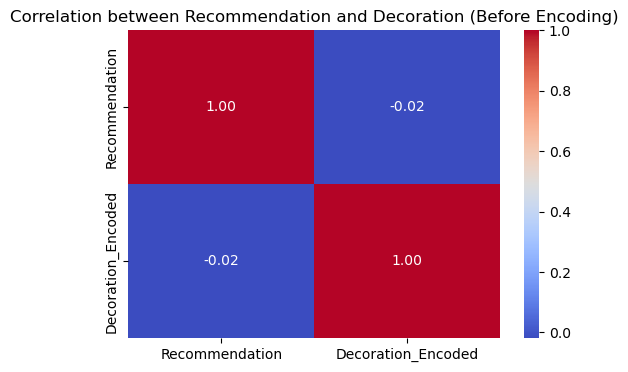

In [60]:
# Temporary Label Encoding for 'Decoration' (without altering the original column)
temp_data = data.copy()
label_encoder = LabelEncoder()

# Encode only non-null values of Decoration
if temp_data['Decoration'].isnull().sum() > 0:
    temp_data['Decoration'] = temp_data['Decoration'].fillna('Missing')  # Fill NaNs temporarily
temp_data['Decoration_Encoded'] = label_encoder.fit_transform(temp_data['Decoration'])

# Calculate the correlation matrix
correlation_matrix = temp_data[['Recommendation', 'Decoration_Encoded']].corr()

# Print the correlation matrix
print("Correlation Matrix between Recommendation and Decoration (before encoding):")
print(correlation_matrix)

# Visualize the correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Recommendation and Decoration (Before Encoding)")
plt.show()

In [61]:
data.drop(columns=['Decoration'], inplace=True)

In [62]:
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,acrylic,chiffon,striped,0
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,solid,1
476,532874347,Casual,Average,4.7,M,Summer,v-neck,full,cotton,NaN,solid,1
477,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,silk,broadcloth,print,1


In [63]:
data['Size'].value_counts()

Size
M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: count, dtype: int64

In [64]:
# Replace 'S', 's', and 'Small' with 'S' in the 'Size' column
data['Size'] = data['Size'].replace(['s', 'Small'], 'S')


In [65]:
data['Price'].value_counts()

Price
Average      240
Low          165
Medium        30
High          21
very-high     21
Name: count, dtype: int64

In [66]:
# Replace 'Average' and 'Medium' with 'Medium' in the 'Price' column
data['Price']=data['Price'].replace('Average', 'Medium')

In [67]:
# Replace 'very-high' with 'Very-high' in the 'Price' column
data['Price']=data['Price'].replace('very-high', 'Very-high')

In [68]:
data['Season'].value_counts()

Season
Summer    154
Spring    116
Winter     94
Automn     59
winter     45
Autumn      7
spring      2
Name: count, dtype: int64

In [69]:
#Replace "spring" by "Spring"
data['Season']=data['Season'].replace('spring', 'Spring')


In [70]:
#Replace "winter" by "Winter"
data["Season"]=data['Season'].replace('winter', 'Winter')

In [71]:
#Replace "Automn" by "Autumn"
data["Season"]=data['Season'].replace('Automn', 'Autumn')


In [72]:
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,animal,0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full,polyster,NaN,print,0
3,966005983,Brief,Medium,4.6,L,Spring,o-neck,full,silk,chiffon,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Medium,4.7,M,Winter,o-neck,halfsleeve,acrylic,chiffon,striped,0
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,solid,1
476,532874347,Casual,Medium,4.7,M,Summer,v-neck,full,cotton,NaN,solid,1
477,655464934,Casual,Medium,4.6,L,Winter,boat-neck,sleevless,silk,broadcloth,print,1


In [73]:
data['NeckLine'].value_counts()

NeckLine
o-neck             257
v-neck             119
slash-neck          25
boat-neck           18
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      5
sqare-collor         5
open                 3
Scoop                2
ruffled              1
mandarin-collor      1
sweetheart           1
halter               1
backless             1
Name: count, dtype: int64

In [74]:
# Define replacements
replacements = {
    'o-neck': 'round-neck',
    'v-neck': 'v-neck',
    'slash-neck': 'slash-neck',
    'boat-neck': 'boat-neck',
    'sweetheart': 'sweetheart-neck',
    'turndowncollor': 'turn-down-collar',
    'bowneck': 'bow-neck',
    'peterpan-collor': 'peterpan-collar',
    'sqare-collor': 'square-collar',
    'open': 'open-neck',
    'Scoop': 'scoop-neck',
    'ruffled': 'ruffled-neck',
    'mandarin-collor': 'mandarin-collar',
    'halter': 'halter-neck',
    'backless': 'backless-neck'
}

# Replace values in the NeckLine column
data['NeckLine'] = data['NeckLine'].replace(replacements)

In [75]:
data['SleeveLength'].value_counts()

SleeveLength
sleevless         216
full               94
short              92
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
sleeevless          2
cap-sleeves         2
urndowncollor       1
half                1
turndowncollor      1
threequater         1
Petal               1
butterfly           1
sleveless           1
Name: count, dtype: int64

In [76]:
# Define replacements
replacements = {
    'sleevless': 'sleeveless',
    'sleveless': 'sleeveless',
    'sleeevless': 'sleeveless',
    'capsleeves': 'cap-sleeves',
    'threequarter': 'three-quarters',
    'thressqatar': 'three-quarters',
    'threequater': 'three-quarters',
    'halfsleeve': 'half-sleeve',
    'half': 'half-sleeve',
    'turndowncollor': 'turn-down-collar',
    'urndowncollor': 'turn-down-collar'
}

# Replace values in the SleeveLength column
data['SleeveLength'] = data['SleeveLength'].replace(replacements)

In [77]:
data['Material'].value_counts()

Material
cotton           148
polyster          93
silk              26
chiffonfabric     24
mix               12
nylon             10
rayon             10
milksilk           5
spandex            5
cashmere           4
acrylic            3
microfiber         3
lycra              3
linen              3
other              2
viscos             2
shiffon            2
lace               1
modal              1
sill               1
wool               1
model              1
Name: count, dtype: int64

In [78]:
# Define replacements
replacements = {
    'polyster': 'polyester',
    'chiffonfabric': 'chiffon',
    'milksilk': 'milk-silk',
    'viscos': 'viscose',
    'shiffon': 'chiffon',
    'sill': 'silk',
    'model': 'modal'
}

# Replace values in the Material column
data['Material'] = data['Material'].replace(replacements)

In [79]:
# Check for null values
print("Null values in 'Material':", data['Material'].isnull().sum())


Null values in 'Material': 119


In [80]:
# Fill null values with 'Unknown'
data['Material'] = data['Material'].fillna('Unknown')

In [81]:
data['FabricType'].value_counts()

FabricType
chiffon       129
broadcloth     29
worsted        18
jersey         12
shiffon         8
sattin          6
batik           2
wollen          2
Corduroy        2
poplin          2
tulle           2
knitted         1
lace            1
organza         1
knitting        1
flannel         1
dobby           1
woolen          1
flannael        1
satin           1
other           1
terry           1
Name: count, dtype: int64

In [82]:
# Define replacements
replacements = {
    'shiffon': 'chiffon',
    'sattin': 'satin',
    'wollen': 'woolen',
    'Corduroy': 'corduroy',
    'flannael': 'flannel'
}

# Replace values in the FabricType column
data['FabricType'] = data['FabricType'].replace(replacements)


In [83]:
# Check for null values
print("Null values in 'FabricType':", data['FabricType'].isnull().sum())


Null values in 'FabricType': 256


In [84]:
# Handle null values by filling with 'Unknown'
data['FabricType'] = data['FabricType'].fillna('Unknown')

In [85]:
data['Pattern Type'].value_counts()

Pattern Type
solid        199
print         67
patchwork     47
animal        19
striped       15
dot           13
geometric      5
plaid          3
leopard        3
floral         2
character      1
splice         1
leapord        1
none           1
Name: count, dtype: int64

In [86]:
replacements = {
    'leapord': 'leopard',
    'none': 'solid',  # Assuming "none" can be treated as a solid pattern.
}

# Replace values in the Pattern Type column
data['Pattern Type'] = data['Pattern Type'].replace(replacements)

In [87]:
#remplir les valeurs none in pattern type by solid
data['Pattern Type'].fillna('solid', inplace=True)

C:\Users\ouesl\AppData\Local\Temp\ipykernel_7188\2114573030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pattern Type'].fillna('solid', inplace=True)


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        479 non-null    object 
 9   FabricType      479 non-null    object 
 10  Pattern Type    479 non-null    object 
 11  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 45.0+ KB


In [89]:
#2 rows does not contain season we will drop them
data.dropna(inplace=True)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 478
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        472 non-null    int64  
 1   Style           472 non-null    object 
 2   Price           472 non-null    object 
 3   Rating          472 non-null    float64
 4   Size            472 non-null    object 
 5   Season          472 non-null    object 
 6   NeckLine        472 non-null    object 
 7   SleeveLength    472 non-null    object 
 8   Material        472 non-null    object 
 9   FabricType      472 non-null    object 
 10  Pattern Type    472 non-null    object 
 11  Recommendation  472 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 47.9+ KB


In [91]:
#drop dress_id
data.drop(columns=['Dress_ID'], inplace=True)

In [92]:
data

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,round-neck,sleeveless,Unknown,chiffon,animal,1
1,Casual,Low,0.0,L,Summer,round-neck,Petal,microfiber,Unknown,animal,0
2,vintage,High,0.0,L,Autumn,round-neck,full,polyester,Unknown,print,0
3,Brief,Medium,4.6,L,Spring,round-neck,full,silk,chiffon,print,1
4,cute,Low,4.5,M,Summer,round-neck,butterfly,chiffon,chiffon,dot,0
...,...,...,...,...,...,...,...,...,...,...,...
474,Brief,Medium,4.7,M,Winter,round-neck,half-sleeve,acrylic,chiffon,striped,0
475,Casual,Low,4.7,M,Spring,round-neck,full,polyester,Unknown,solid,1
476,Casual,Medium,4.7,M,Summer,v-neck,full,cotton,Unknown,solid,1
477,Casual,Medium,4.6,L,Winter,boat-neck,sleeveless,silk,broadcloth,print,1


In [93]:
for i in data.columns:
  print(i,'    ',data[i].unique())

Style      ['Sexy' 'Casual' 'vintage' 'Brief' 'cute' 'bohemian' 'Flare' 'party'
 'sexy' 'Novelty' 'work' 'OL' 'fashion']
Price      ['Low' 'High' 'Medium' 'Very-high']
Rating      [4.6 0.  4.5 5.  4.7 4.8 4.3 4.  4.4 4.9 4.2 3.6 3.7 4.1 3.5 1.  3. ]
Size      ['M' 'L' 'XL' 'free' 'S' 'small']
Season      ['Summer' 'Autumn' 'Spring' 'Winter']
NeckLine      ['round-neck' 'v-neck' 'boat-neck' 'peterpan-collar' 'ruffled-neck'
 'turn-down-collar' 'slash-neck' 'mandarin-collar' 'open-neck'
 'square-collar' 'Sweetheart' 'sweetheart-neck' 'scoop-neck' 'halter-neck'
 'backless-neck' 'bow-neck']
SleeveLength      ['sleeveless' 'Petal' 'full' 'butterfly' 'short' 'three-quarters'
 'half-sleeve' 'cap-sleeves' 'turn-down-collar']
Material      ['Unknown' 'microfiber' 'polyester' 'silk' 'chiffon' 'cotton' 'nylon'
 'other' 'milk-silk' 'linen' 'rayon' 'lycra' 'mix' 'acrylic' 'spandex'
 'lace' 'modal' 'cashmere' 'viscose' 'wool']
FabricType      ['chiffon' 'Unknown' 'broadcloth' 'jersey' 'other' 'batik'

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           472 non-null    object 
 1   Price           472 non-null    object 
 2   Rating          472 non-null    float64
 3   Size            472 non-null    object 
 4   Season          472 non-null    object 
 5   NeckLine        472 non-null    object 
 6   SleeveLength    472 non-null    object 
 7   Material        472 non-null    object 
 8   FabricType      472 non-null    object 
 9   Pattern Type    472 non-null    object 
 10  Recommendation  472 non-null    int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 44.2+ KB


In [95]:
data

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,round-neck,sleeveless,Unknown,chiffon,animal,1
1,Casual,Low,0.0,L,Summer,round-neck,Petal,microfiber,Unknown,animal,0
2,vintage,High,0.0,L,Autumn,round-neck,full,polyester,Unknown,print,0
3,Brief,Medium,4.6,L,Spring,round-neck,full,silk,chiffon,print,1
4,cute,Low,4.5,M,Summer,round-neck,butterfly,chiffon,chiffon,dot,0
...,...,...,...,...,...,...,...,...,...,...,...
474,Brief,Medium,4.7,M,Winter,round-neck,half-sleeve,acrylic,chiffon,striped,0
475,Casual,Low,4.7,M,Spring,round-neck,full,polyester,Unknown,solid,1
476,Casual,Medium,4.7,M,Summer,v-neck,full,cotton,Unknown,solid,1
477,Casual,Medium,4.6,L,Winter,boat-neck,sleeveless,silk,broadcloth,print,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           472 non-null    object 
 1   Price           472 non-null    object 
 2   Rating          472 non-null    float64
 3   Size            472 non-null    object 
 4   Season          472 non-null    object 
 5   NeckLine        472 non-null    object 
 6   SleeveLength    472 non-null    object 
 7   Material        472 non-null    object 
 8   FabricType      472 non-null    object 
 9   Pattern Type    472 non-null    object 
 10  Recommendation  472 non-null    int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 44.2+ KB


#Data Modeling

In [97]:
# Data Preprocessing: Encode categorical variables
label_encoders = {}  # Dictionary to store label encoders
for column in data.columns:
    if data[column].dtype == 'object':  # Only encode categorical columns
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  # Save encoder for each column


In [98]:
# Define features (X) and target variable (y)
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [101]:

# Make predictions
y_pred = clf.predict(X_test)

In [102]:
  # Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4631578947368421

Confusion Matrix:
 [[24 25]
 [26 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.48        49
           1       0.44      0.43      0.44        46

    accuracy                           0.46        95
   macro avg       0.46      0.46      0.46        95
weighted avg       0.46      0.46      0.46        95



In [103]:
# Save the trained model
model_filename = 'decision_tree_model.pkl'
joblib.dump(clf, model_filename)
print(f"Decision Tree model saved to {model_filename}")

# Save the label encoders
encoder_filename = 'label_encoders.pkl'
joblib.dump(label_encoders, encoder_filename)
print(f"Label Encoders saved to {encoder_filename}")

Decision Tree model saved to decision_tree_model.pkl
Label Encoders saved to label_encoders.pkl


In [104]:
data

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Pattern Type,Recommendation
0,5,1,4.6,1,2,8,6,0,3,0,1
1,1,1,0.0,0,2,8,0,8,0,0,0
2,11,0,0.0,0,0,8,3,14,0,8,0
3,0,2,4.6,0,1,8,3,16,3,8,1
4,7,1,4.5,1,2,8,1,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
474,0,2,4.7,1,3,8,4,1,3,11,0
475,1,1,4.7,1,1,8,3,14,0,9,1
476,1,2,4.7,1,2,15,3,4,0,9,1
477,1,2,4.6,0,3,2,6,16,2,8,1


Testing the model

In [105]:
# Import libraries
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained Decision Tree model
model_filename = 'decision_tree_model.pkl'
clf = joblib.load(model_filename)
print("Model loaded successfully!")

# Load the saved label encoders
encoder_filename = 'label_encoders.pkl'
label_encoders = joblib.load(encoder_filename)
print("Label Encoders loaded successfully!")

# Function to preprocess new input data
def preprocess_input(data, label_encoders):
    """
    Preprocess input data by encoding categorical columns using saved label encoders.

    Args:
        data (pd.DataFrame): Input data for prediction.
        label_encoders (dict): Dictionary of saved label encoders.

    Returns:
        pd.DataFrame: Encoded input data.
    """
    for column in data.columns:
        if column in label_encoders:  # Encode only if a LabelEncoder exists for this column
            le = label_encoders[column]
            data[column] = le.transform(data[column])
    return data

# Example input data (replace with your actual input)
new_data = pd.DataFrame({
    'Style': ['Casual'],
    'Price': ['Low'],
    'Rating': [4.5],
    'Size': ['M'],
    'Season': ['Summer'],
    'NeckLine': ['round-neck'],
    'SleeveLength': ['short'],
    'Material': ['cotton'],
    'FabricType': ['chiffon'],
    'Pattern Type': ['solid']
})

# Preprocess the input data
try:
    processed_data = preprocess_input(new_data, label_encoders)
    print("Input data preprocessed successfully!")
except ValueError as e:
    print("Error in encoding input data. Ensure all values match training data.")
    print(e)

# Make predictions
prediction = clf.predict(processed_data)
print(f"Prediction for the input data: {prediction}")

# Interpret prediction
if prediction[0] == 1:
    print("The recommendation is: Recommended")
else:
    print("The recommendation is: Not Recommended")


Model loaded successfully!
Label Encoders loaded successfully!
Input data preprocessed successfully!
Prediction for the input data: [0]
The recommendation is: Not Recommended
